In [1]:
import pandas as pd
import numpy as np
import os,sys
import ROOT as rt

Welcome to JupyROOT 6.26/02


In [19]:
save_ = True

In [2]:
data = pd.read_csv('Fig5_NeutronXsecs_Realizations.txt', delimiter='\t',header=None)
data.head()

,0,1,2,3,4,5
0,X_Realization1,Y_Realization1,X_Realization2,Y_Realization2,X_Realization3,Y_Realization3
1,0.00000001,13.2096,0.00000001,12.5305,0.00000001,12.3995
2,0.0000000103125,13.2096,0.0000000103125,12.5305,0.0000000103125,12.3995
3,0.000000010625,13.2096,0.000000010625,12.5305,0.000000010625,12.3995
4,0.0000000109375,13.2096,0.0000000109375,12.5305,0.0000000109375,12.3995


In [3]:
data.columns = [i for i in data.iloc[0]]
title = [i for i in data.iloc[0]]
data = data.drop([0])
data.head()

,X_Realization1,Y_Realization1,X_Realization2,Y_Realization2,X_Realization3,Y_Realization3
1,0.00000001,13.2096,0.00000001,12.5305,0.00000001,12.3995
2,0.0000000103125,13.2096,0.0000000103125,12.5305,0.0000000103125,12.3995
3,0.000000010625,13.2096,0.000000010625,12.5305,0.000000010625,12.3995
4,0.0000000109375,13.2096,0.0000000109375,12.5305,0.0000000109375,12.3995
5,0.00000001125,13.2096,0.00000001125,12.5305,0.00000001125,12.3995


In [4]:
xsec = ['Realization1','Realization2','Realization3']

In [5]:
graphs = []
for i in (xsec):
    non_null = data['X_%s'%(i)].notna()
    x = pd.to_numeric(data['X_%s'%(i)][non_null], errors='coerce')
    y = pd.to_numeric(data['Y_%s'%(i)][non_null], errors='coerce')
    temp_gr = rt.TGraph()
    temp_gr.SetName(i)
    for j in range(len(x)):
        temp_gr.SetPoint(j,(x.iloc[j]),y.iloc[j])
    graphs.append(temp_gr)
    del temp_gr

print('Done!')

for gr in graphs:
    print('Graph for %s'%(gr.GetName()))

Done!
Graph for Realization1
Graph for Realization2
Graph for Realization3


In [6]:
line_color = [rt.kRed, rt.kGreen, rt.kBlue]

0 : Graph for Realization1
1 : Graph for Realization2
2 : Graph for Realization3
Plots saved!!


Info in <TCanvas::Print>: png file ./plots/png/Fig_5.png has been created
Info in <TCanvas::Print>: pdf file ./plots/pdf/Fig_5.pdf has been created


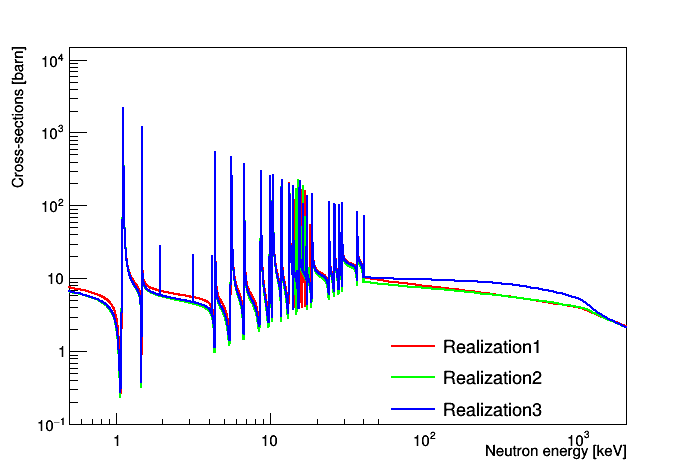

In [20]:
c = rt.TCanvas()
count = 0
legend = rt.TLegend(0.55,0.3,0.9,0.1)

legend.SetBorderSize(0)

for i,graph in enumerate(graphs):
    print ('%d : Graph for %s'%(i,graph.GetName()))
    graph.SetLineColor(line_color[i])
    graph.SetLineWidth(2)
    graph.GetYaxis().SetRangeUser(0.1,1.5e4)
    graph.GetXaxis().SetLimits(0.5,2.e3)
    
    if(not count):
        graph.Draw("AL3")
        count += 1
    else:
        graph.Draw("L3 SAME")
        
    l1 = legend.AddEntry(graph,graph.GetName(),"l")
    l1.SetTextColor(graph.GetMarkerColor())
    
    graph.GetXaxis().SetTitle('Neutron energy [keV]')
    graph.GetYaxis().SetTitle('Cross-sections [barn]')
    

legend.Draw()
c.Draw()
rt.gPad.SetLogx()
rt.gPad.SetLogy()

if(save_):
    c.SaveAs('./plots/png/Fig_5.png')
    c.SaveAs('./plots/pdf/Fig_5.pdf')
    print ('Plots saved!!')
# textOnTop = rt.TLatex()
# textOnTop.SetTextSize(0.05);
# textOnTop.DrawLatexNDC(0.2,0.8,"#bf{(b)}");

# Zoomed

0 : Graph for Realization1
1 : Graph for Realization2
2 : Graph for Realization3
Plots saved!!


Info in <TCanvas::Print>: png file ./plots/png/Fig_5zoomed.png has been created
Info in <TCanvas::Print>: pdf file ./plots/pdf/Fig_5zoomed.pdf has been created


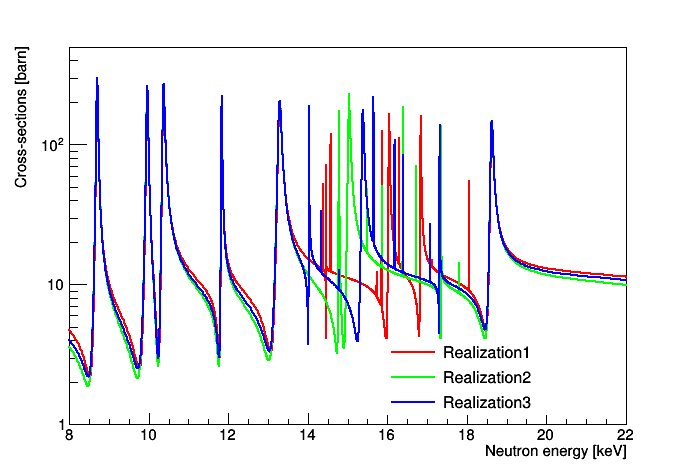

In [21]:
c = rt.TCanvas()
count = 0
legend = rt.TLegend(0.55,0.28,0.9,0.12)

legend.SetBorderSize(0)

for i,graph in enumerate(graphs):
    print ('%d : Graph for %s'%(i,graph.GetName()))
    graph.SetLineColor(line_color[i])
    graph.SetLineWidth(2)
    graph.GetYaxis().SetRangeUser(1,5e2)
    graph.GetXaxis().SetLimits(8,22)
    
    if(not count):
        graph.Draw("AL3")
        count += 1
    else:
        graph.Draw("L3 SAME")
        
    l1 = legend.AddEntry(graph,graph.GetName(),"l")
    l1.SetTextColor(graph.GetMarkerColor())
    
    graph.GetXaxis().SetTitle('Neutron energy [keV]')
    graph.GetYaxis().SetTitle('Cross-sections [barn]')
    

legend.Draw()
c.Draw()
#rt.gPad.SetLogx()
rt.gPad.SetLogy()

# textOnTop = rt.TLatex()
# textOnTop.SetTextSize(0.05);
# textOnTop.DrawLatexNDC(0.2,0.8,"#bf{(b)}");
if(save_):
    c.SaveAs('./plots/png/Fig_5zoomed.png')
    c.SaveAs('./plots/pdf/Fig_5zoomed.pdf')
    print ('Plots saved!!')